In [2]:
import itertools
import numpy as np
import os
import sys
#root_dir = os.path.join(os.path.dirname(os.path.abspath(__file__)), '..')
#sys.path.insert(0, root_dir)

from cie.util import load_from_pickle
from cie.util import imread, img_to_b64, b64_to_img

NameError: name '__file__' is not defined

In [38]:
agendas = load_from_pickle("./sampled_100/agenda.train.pickle")
agenda = agendas[10]
open_goal = agenda[0]
adjust_goal = agenda[1]

In [39]:
image_path = open_goal['slots'][0]['value']

In [40]:
image = imread(image_path)
b64_img_str = img_to_b64(image)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_figure(image):
    plt.figure()
    plt.imshow(image)

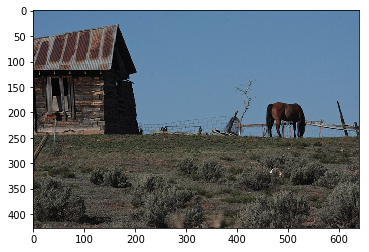

In [42]:
plot_figure(image)

False

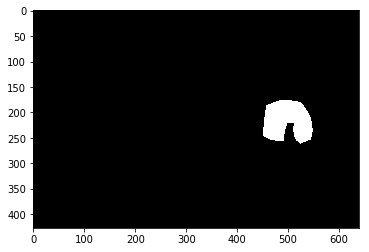

In [43]:
object_mask_str = adjust_goal['slots'][3]['value']
object_mask = b64_to_img(object_mask_str)
plot_figure(object_mask)
((object_mask == 0) | (object_mask==255)).all()

In [44]:
def find_mask_centroid(mask):
    """
    Find the centroid of a 3 dimensional binary mask
    """
#    assert ((mask == 0) | (mask == 255)).all()
    X, Y, Z = mask.shape
    moment_x = 0
    moment_y = 0
    moment_z = 0
    npixels = 0
    for x, y, z in itertools.product(range(X), range(Y), range(Z)):
        if mask[x][y][z] == 255:
            moment_x += x
            moment_y += y
            moment_z += z
            npixels += 1

    moment_x /= npixels
    moment_y /= npixels
    moment_z /= npixels
    return round(moment_x), round(moment_y), round(moment_z)

def create_gesture_click(object_mask):
    """
    Returns a mask as gestures
    """
    x, y, _ = find_mask_centroid(object_mask)
    gesture_click = np.zeros_like(object_mask)
    gesture_click[x, y] = 255
    return gesture_click

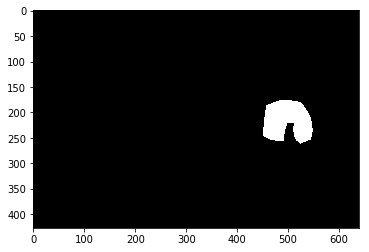

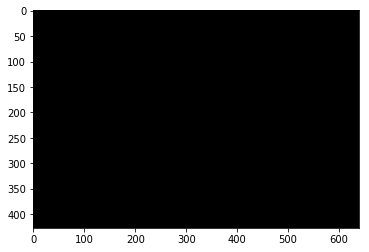

In [45]:
object_mask_str = adjust_goal['slots'][3]['value']
object_mask = b64_to_img(object_mask_str)
plot_figure(object_mask)
gesture_click = create_gesture_click(object_mask)
plot_figure(gesture_click)

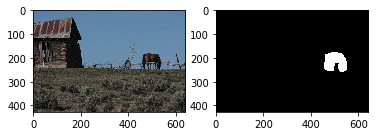

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(image)
ax2.imshow(object_mask)